# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [56]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


##Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer: If we use PCA(n_componets = n), we will obtain n vectors. These vectors have two important properties. First these n vectors are orthogonal each other. It means these vectors are part of "basis of feature data's dimension". The data set's dimension can represent with some basis. These vectors are the 'n' most important basis among the basis.

ICA will return independent components set. We have 6 features now. But these are not (statistical) independent features. ICA algorithm will return (statistical) independent features. This means one feature doesn't affect other features value(statistically). For example, When we see original features, if someone buy fresh, then they are prone to buy milk. So the features in original data set is not independent each other. But ICA can find (hidden new) independent features of data set.

###PCA

In [57]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(data)

# Print the components and the amount of variance in the data contained in each dimension
print pca.components_
print pca.explained_variance_ratio_

[[-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471]
 [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921]
 [-0.17855726  0.50988675 -0.27578088  0.71420037 -0.20440987  0.28321747]
 [-0.04187648 -0.64564047  0.37546049  0.64629232  0.14938013 -0.02039579]
 [ 0.015986    0.20323566 -0.1602915   0.22018612  0.20793016 -0.91707659]
 [-0.01576316  0.03349187  0.41093894 -0.01328898 -0.87128428 -0.26541687]]
[ 0.45961362  0.40517227  0.07003008  0.04402344  0.01502212  0.00613848]


**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

Answer: The value drops really quickly as components go backward. Particularly, the first two variance shows large variance. From third elements, we can see the variance drops dramatically. So based on elbow method, I will choose two components as new eigenvectors. So our new frame would have two dimensions.

**3)** What do the dimensions seem to represent? How can you use this information?

Answer: Let's talk about two major basis vectors. First one is [-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471]. As we can see this one is almost similar to firstfeature(Fresh). So this information says that fresh_feature will be a important factor. Second major component is [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921]. From this vector, we can check that the weighted sum of milk, grocery and detegernt_paper would be a important factor. we call these new componets 'eigenvectors'. Eigenvectors have given us a much more useful axis to frame the data in. So eigenvectors can be thought as a new imortant features. When we see second eigenvector, we can check that milk, grocery, and detergent got lumped together. It means they are tend to move together, and this amount is important to divide types of customers.

###ICA

In [58]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA
ica = FastICA(n_components=6)
ica.fit(data-np.mean(data))

# Print the independent components
print ica.components_

[[  3.00926086e-07  -2.29618392e-06  -1.20880450e-05   1.46113214e-06
    2.82118491e-05   5.73389002e-06]
 [ -3.97579173e-06   8.57977397e-07   6.18382619e-07   6.77948115e-07
   -2.04840631e-06   1.04660564e-06]
 [  8.65263393e-07   1.40244751e-07  -7.74324439e-07  -1.11460947e-05
    5.56207016e-07   5.95245714e-06]
 [ -1.53395821e-07  -9.84653673e-06   5.80641114e-06   3.64489626e-07
   -3.30495729e-06   6.05919685e-06]
 [  2.11229256e-07  -1.89348693e-06   6.37603620e-06   4.17649688e-07
   -6.91319551e-07  -1.43017349e-06]
 [  3.86382886e-07   2.19523196e-07   6.01486674e-07   5.22080723e-07
   -5.10791581e-07  -1.80928229e-05]]


**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

Answer: As I mentioned they are independent set, and they maximize the statistical independence. So It can be interpreted new feature of data set.

##Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

###Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer: First let's talk about K means algorithm.
- (Pros) Simple and fast for data with low dimensionality.
- (Cons) K means cannot discern outliers.

Follwing properties are Gaussian EM models'.
- (Pros) Soft clustering is enabled. (calculate probablity of belonging to each group)
- (Pros) Obtain a density estimation for each cluster (also can discern outliers)
- (Cons) With a large data set, calculation can be slow.

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [59]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [60]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(data)

reduced_data = pca.fit_transform(data)
print reduced_data[:10]  # print upto 10 elements

[[  -650.02212207   1585.51909007]
 [  4426.80497937   4042.45150884]
 [  4841.9987068    2578.762176  ]
 [  -990.34643689  -6279.80599663]
 [-10657.99873116  -2159.72581518]
 [  2765.96159271   -959.87072713]
 [   715.55089221  -2013.00226567]
 [  4474.58366697   1429.49697204]
 [  6712.09539718  -2205.90915598]
 [  4823.63435407  13480.55920489]]


In [61]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'
# implemnt two algorithm (KMean & GMM) so that we can compare two algorithms' results.
gmm_clusters = GMM(n_components=6)
gmm_clusters.fit(reduced_data)

km_clusters = KMeans(n_clusters=6)
km_clusters.fit(reduced_data)
print gmm_clusters

GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=6, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0)


In [62]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
gmm_Z = gmm_clusters.predict(np.c_[xx.ravel(), yy.ravel()])
km_Z = km_clusters.predict(np.c_[xx.ravel(), yy.ravel()])

In [63]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 
gmm_centroids = gmm_clusters.means_
km_centroids = km_clusters.cluster_centers_

print gmm_centroids
print km_centroids

[[-18924.64230364  46103.260314  ]
 [ -5571.0899166   -2779.55131355]
 [  2938.08476714  -7176.1186377 ]
 [-31321.8695949   -6792.4522633 ]
 [  3071.81011505  13681.03833743]
 [  9504.73592374   2943.88469516]]
[[ -8989.87450722  -4721.39130415]
 [  2787.06628956  24275.2601508 ]
 [  7131.44837834   6516.53574907]
 [-20964.64986166  68819.21772923]
 [  6187.56191143  -5634.4000221 ]
 [-37090.26267941  -5656.14400877]]


-------------Customer_segmentaion by GMM algorithm---------------


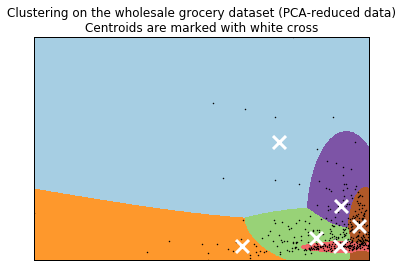

[[ 25381.24881145  31869.79229416  44366.75440191   5092.16543749
   19591.85678113   5445.26556056]
 [ 17748.12919093   5037.69469656   6168.86165438   3972.81161521
    1826.68255538   1745.63331711]
 [  9924.92785304   1738.75935236   2283.56025174   2758.63338257
     280.41852543    915.16583702]
 [ 43338.59679965   6088.41603291   4685.28506925   7971.45472631
     178.9156669    3270.32947724]
 [  7487.24955724  12480.72056174  18222.84613637   2347.74033945
    7901.54005142   2096.56862086]
 [  2392.93845093   6162.90539821   9617.26512244   1568.6266562
    4024.09175581   1045.58779051]]
--------------------------------------------------------------------
-------------Customer_segmentaion by KMeans algorithm---------------


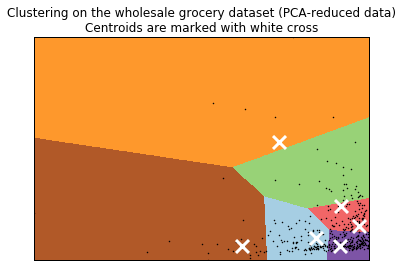

[[ 21301.49272078   4450.39167164   4894.51174654   4530.07138071
    1093.11313465   1867.62995226]
 [  6593.44466414  17979.74945837  26340.7790254    2192.76479303
   11770.13843656   2720.67086227]
 [  4315.35647366   8293.29117     12494.98997787   1863.33933979
    5312.62096043   1411.14396239]
 [ 24860.69170589  43833.94858552  61861.06334885   4977.66921543
   27876.75857623   6880.80866079]
 [  6581.15825109   2140.1962739    3262.3940483    2234.66173607
     866.60897263    781.86122317]
 [ 48845.95374862   7373.5636397    5909.10279373   8829.07812662
     553.37550869   3728.04379808]]


In [64]:
# Put the result into a color plot
gmm_Z = gmm_Z.reshape(xx.shape)
km_Z = km_Z.reshape(xx.shape)

# plot for GMM algorithm
print "-------------Customer_segmentaion by GMM algorithm---------------"
plt.figure(1)
plt.clf()
plt.imshow(gmm_Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()
# analyze the centroids coordinate
print pca.inverse_transform(gmm_centroids)
print "--------------------------------------------------------------------"

# plot for KMeans algorithm
print "-------------Customer_segmentaion by KMeans algorithm---------------"
plt.figure(1)
plt.clf()
plt.imshow(km_Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()
# analyze the centroids coordinate
print pca.inverse_transform(km_centroids)

**7)** What are the central objects in each cluster? Describe them as customers.

Answer: These central points represent each clusters. I divided to 6 groups. I can say that two people who are belonging to same group have similar pattern of consumption. And also they will respond very similarly to some events.
Furthermore each group can be represented by their centroid. Using inverse_transform, I printed the features' information of centroids

###Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

Answer: As you can see on second picture I tried to classify using KMeans algorithm. But the segmentation seems not that meaningful. I believe that the segmentation with GMM classifier seems more meaningful. Gaussian Mixture Model. It considers not only distance but also probability. So the GMM is more natural separation. On the other hands, KMeans algorithm's separation looks not meaningful. It just divide the area geometricaly.

Let's talk about PCA and ICA. Basically ICA is not used for reducing dimensionality. It is userful when separate mixed signals. If we want to discern featured signal from others, we can use ICA. On the other hand, PCA is the optimized method to reduce dimensionality or to compress the data size. So in this case I would like to choose PCA method so that compress data and reduce dimensionality which can prevent the overfitting problem.

**9)** How would you use that technique to help the company design new experiments?

Answer: Customer segmentation is really important task to marketing part. Using this data we can apply suitable advertisement or promotion to each segmentation group. For example, for green group customers, we can give them to sale promotion code or coupon of fresh food. Or delivery service for another group.

Also we can manage group respectively. If we manage whole people at once, there are many problems. Group with large number(like light green, brown group)'s tendency is much more powerfull than small groups tendency. So, in this case people of group(light green)'s dissatisfaction can be ignored by noise of major group. However using a segmentation and managing respectively can prevent these kinds of problems.

Moreover, once we classify the data set, A/B testing become really useful. When we test something, there are really lots of variables. And it is very important to manage variables. Execpt target variables, we should keep other variables same values. As we classify the data set to some groups, we can perform the A/B test on same group. It will maintain other feautres same and only variable related to testing would be different. It is ideal environment to A/B testing.

**10)** How would you use that data to help you predict future customer needs?

Answer: I will store data separately based on their group. I can take a suvey from people who belongs to different groups. And their opinion can represent their group. So I can predict their needs likewise.

People in same group are prone to behave similar. So when we apply machine learning, training should not be weighted on one group. I mean, when we split the training data we can choose data uniformly in each sections.